In [81]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [82]:
df = pd.read_csv("QDOIS_intergalaxy_sales.csv")
#string to datetime type
df['date'] = pd.to_datetime(df['date'])

In [83]:
df['yearweek'] = df['date'].dt.strftime('%Y-%U')

In [5]:
df_deep = df[df["product"]=="deep though"]
df_eddie = df[df["product"]=="eddie"]
df_inf = df[df["product"]=="infinite improbability drive"]
df_marwin = df[df["product"]=="marwin"]
df_towel = df[df["product"]=="towel"]
df_vogon = df[df["product"]=="vogon poetry"]

In [49]:
df_deep1 = pd.DataFrame(df_deep["date"].groupby([df_deep.date]).agg('count'))

In [50]:
indexdata = df_deep1.set_index(df_deep1.index)

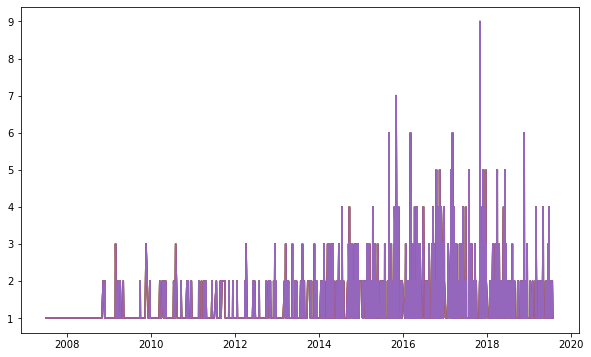

In [35]:
plt.plot(indexdata)

In [51]:
indexLogScale = np.log(indexdata)

In [46]:
indexLogScale

,geocode,price,planet,product,yearweek
date,,,,,
2007-07-02,0.000000,0.000000,0.000000,0.000000,0.000000
2007-07-06,0.000000,0.000000,0.000000,0.000000,0.000000
2007-08-07,0.000000,0.000000,0.000000,0.000000,0.000000
2007-08-21,0.000000,0.000000,0.000000,0.000000,0.000000
2007-09-21,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2019-07-08,0.693147,0.693147,0.693147,0.693147,0.693147
2019-07-15,0.000000,0.000000,0.000000,0.000000,0.000000
2019-07-19,0.693147,0.693147,0.693147,0.693147,0.693147


In [42]:
from statsmodels.tsa.arima_model import ARIMA 

In [184]:
model = ARIMA(indexLogScale, order=(2,1,0))

C:\Users\llemo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\llemo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [185]:
res_arima = model.fit(disp=-1)

C:\Users\llemo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\llemo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\llemo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


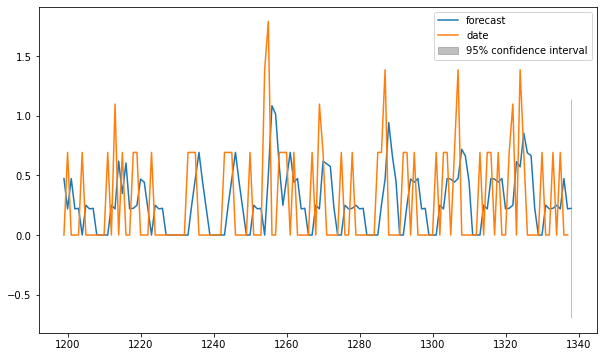

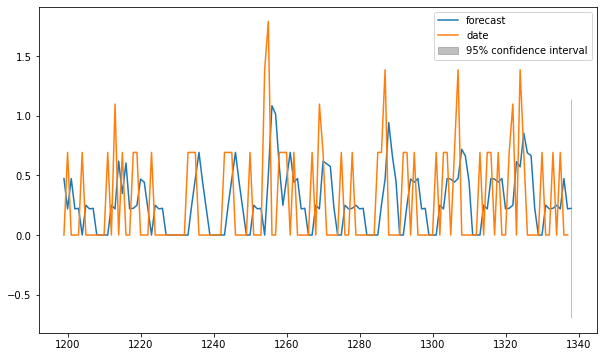

In [186]:
res_arima.plot_predict(1200,1339)

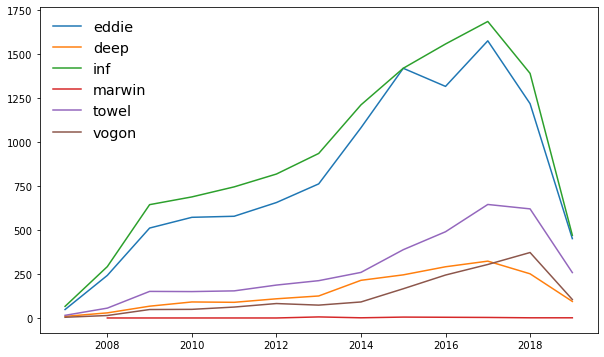

In [154]:
#plt.plot(df_deep.groupby([df_deep.date.dt.year]).agg('count'))
#plt.plot(df_eddie.groupby([df_eddie.date.dt.year]).agg('count'))
#plt.plot(df_inf.groupby([df_inf.date.dt.year]).agg('count'))
#plt.plot(df_marwin.groupby([df_marwin.date.dt.year]).agg('count'))
#plt.plot(df_towel.groupby([df_towel.date.dt.year]).agg('count'))
#plt.plot(df_vogon.groupby([df_vogon.date.dt.year]).agg('count')
fig, ax = plt.subplots()
ax.plot(df_eddie["date"].groupby([df_eddie.date.dt.year]).agg('count'), label="eddie")
ax.plot(df_deep["date"].groupby([df_deep.date.dt.year]).agg('count'), label="deep")
ax.plot(df_inf["date"].groupby([df_inf.date.dt.year]).agg('count'), label="inf")
ax.plot(df_marwin["date"].groupby([df_marwin.date.dt.year]).agg('count'), label="marwin")
ax.plot(df_towel["date"].groupby([df_towel.date.dt.year]).agg('count'), label="towel")
ax.plot(df_vogon["date"].groupby([df_vogon.date.dt.year]).agg('count'), label="vogon")
legend = ax.legend(shadow=False, fontsize='x-large', frameon=False)
plt.show()

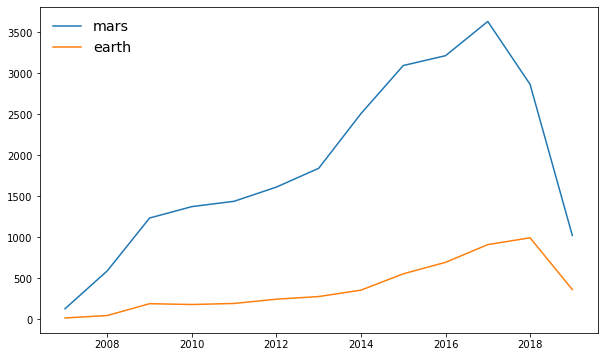

In [157]:
fig, ax = plt.subplots()
df_mars = df[df["planet"]=="mars"]
df_earth = df[df["planet"]=="earth"]
ax.plot(df_mars["date"].groupby([df_mars.date.dt.year]).agg('count'), label="mars")
ax.plot(df_earth["date"].groupby([df_earth.date.dt.year]).agg('count'), label="earth")
legend = ax.legend(shadow=False, fontsize='x-large', frameon=False)

In [152]:
print((df["date"].groupby([df["planet"]]).agg('count')))

planet
earth     5028
mars     24552
Name: date, dtype: int64


In [160]:
print((df["date"].groupby([df["product"]]).agg('count')))

product
deep though                      1950
eddie                           10442
infinite improbability drive    11933
marwin                             30
towel                            3598
vogon poetry                     1627
Name: date, dtype: int64


[1950, 10442, 11933, 30, 3598, 1627]


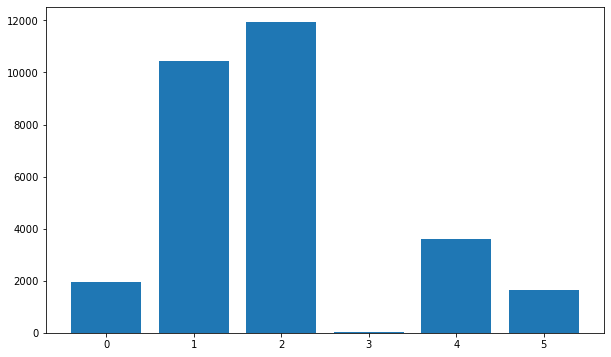

In [159]:
fig, ax = plt.subplots() 
vendas = list((df["date"].groupby([df["product"]]).agg('count')))
ano = range(0,6)
ax.bar(ano, vendas, label="a")
print(vendas)

In [ ]:
plt.plot(df.groupby([df.date.dt.year]).agg('count'))
plt.xlabel("Ano", fontsize=18)
plt.ylabel("Vendas", fontsize=18)
plt.show()

1722

In [102]:
df_2007 = df[df.date.dt.year == 2007]
df_2008 = df[df.date.dt.year == 2008]
df_2009 = df[df.date.dt.year == 2009]
df_2010 = df[df.date.dt.year == 2010]
df_2011 = df[df.date.dt.year == 2011]
df_2012 = df[df.date.dt.year == 2012]
df_2013 = df[df.date.dt.year == 2013]
df_2014 = df[df.date.dt.year == 2014]
df_2015 = df[df.date.dt.year == 2015]
df_2016 = df[df.date.dt.year == 2016]
df_2017 = df[df.date.dt.year == 2017]
df_2018 = df[df.date.dt.year == 2018]
df_2019 = df[df.date.dt.year == 2019]

In [130]:
for v in enumerate(vendas):
    print(v)#, i, " "+str(v), color='blue', va='center', fontweight='bold')

(0, 147)
(1, 639)
(2, 1426)
(3, 1555)
(4, 1633)
(5, 1858)
(6, 2119)
(7, 2863)
(8, 3648)
(9, 3908)
(10, 4541)
(11, 3858)
(12, 1385)


<BarContainer object of 13 artists>

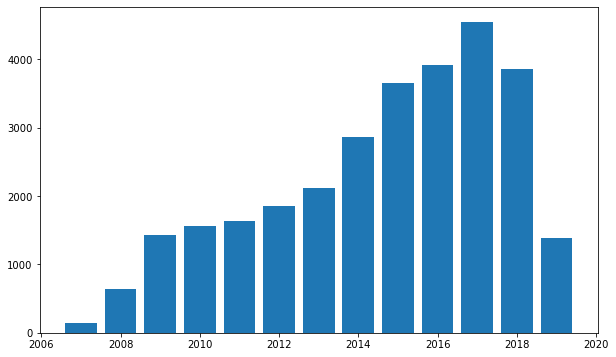

In [131]:
fig, ax = plt.subplots() 
vendas = list((df["date"].groupby([df.date.dt.year]).agg('count')))
ano = list(range(2007, 2020, 1))
ax.bar(ano, vendas, label="a")

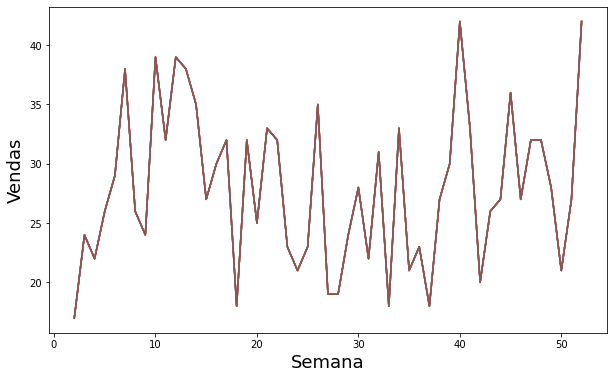

In [289]:
#plt.plot(df.groupby([df_2007.date.dt.isocalendar().week]).agg('count'))
#plt.plot(df.groupby([df_2008.date.dt.isocalendar().week]).agg('count'))
plt.plot(df.groupby([df_2009.date.dt.isocalendar().week]).agg('count'))
#plt.plot(df.groupby([df_2010.date.dt.isocalendar().week]).agg('count'))
#plt.plot(df.groupby([df_2011.date.dt.isocalendar().week]).agg('count'))
#plt.plot(df.groupby([df_2012.date.dt.isocalendar().week]).agg('count'))
#plt.plot(df.groupby([df_2013.date.dt.isocalendar().week]).agg('count'))
#plt.plot(df.groupby([df_2014.date.dt.isocalendar().week]).agg('count'))
#plt.plot(df.groupby([df_2015.date.dt.isocalendar().week]).agg('count'))
#plt.plot(df.groupby([df_2016.date.dt.isocalendar().week]).agg('count'))
#plt.plot(df.groupby([df_2017.date.dt.isocalendar().week]).agg('count'))
#plt.plot(df.groupby([df_2018.date.dt.isocalendar().week]).agg('count'))
#plt.plot(df.groupby([df_2019.date.dt.isocalendar().week]).agg('count'))
plt.xlabel("Semana", fontsize=18)
plt.ylabel("Vendas", fontsize=18)
plt.show()

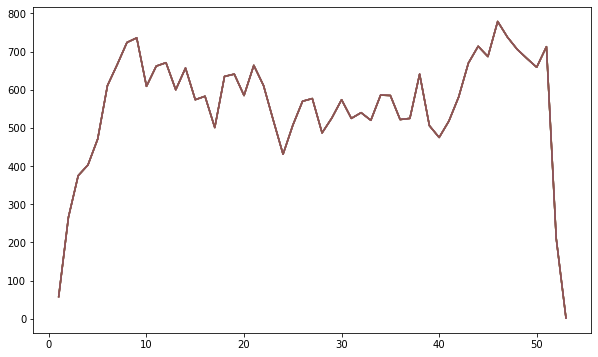

In [255]:
plt.plot(df.groupby([df.date.dt.isocalendar().week]).agg('count'))

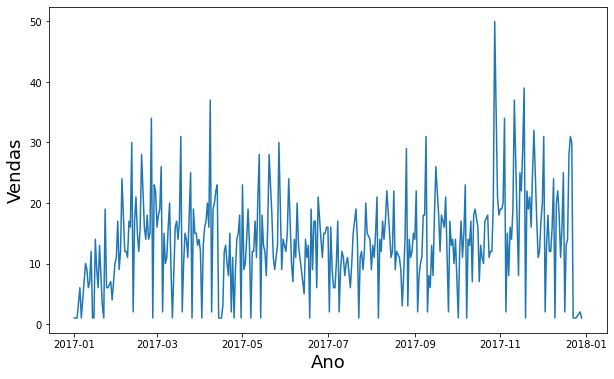

In [37]:
plt.plot(df["date"].groupby([df_2017.date]).agg('count'))
plt.xlabel("Ano", fontsize=18)
plt.ylabel("Vendas", fontsize=18)
plt.show()

In [ ]:
plt.plot(df.groupby([df.date.dt.isocalendar().week]).agg('count'))
plt.xlabel("Ano", fontsize=18)
plt.ylabel("Vendas", fontsize=18)
plt.show()

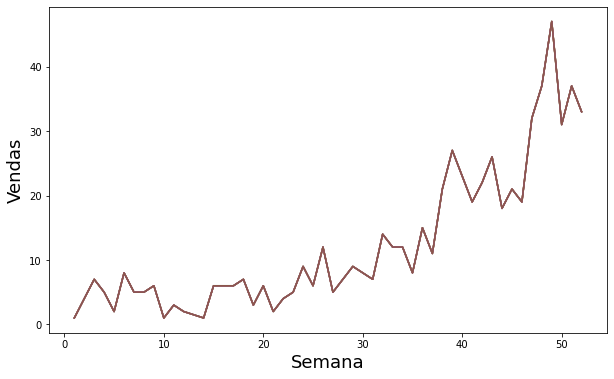

In [98]:
plt.plot(df.groupby([df_2008.date.dt.isocalendar().week]).agg('count'))
plt.xlabel("Semana", fontsize=18)
plt.ylabel("Vendas", fontsize=18)
plt.show()

,date,geocode,price,planet,product,yearweek
date,,,,,,
1,1304,1304,1304,1304,1304,1304
2,2656,2656,2656,2656,2656,2656
3,2878,2878,2878,2878,2878,2878
4,2468,2468,2468,2468,2468,2468
5,2797,2797,2797,2797,2797,2797
6,2213,2213,2213,2213,2213,2213
7,2386,2386,2386,2386,2386,2386
8,2429,2429,2429,2429,2429,2429
9,2367,2367,2367,2367,2367,2367


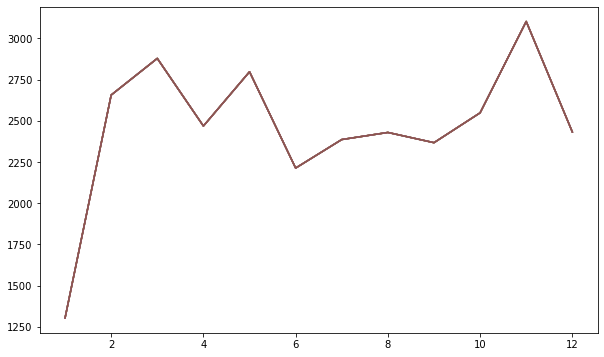

In [180]:
plt.plot(df.groupby([df.date.dt.month]).agg('count'))
meses = df.groupby([df.date.dt.month]).agg('count')
meses

In [52]:
a = pd.DataFrame(df["date"].groupby([df.date]).agg('count'))

In [57]:
b = df["date"].groupby([df.yearweek]).agg('count')

In [55]:
a = a.rename(columns = {"date":"vendas"})
a

,vendas
date,
2007-02-07,1
2007-02-27,1
2007-03-07,1
2007-03-09,1
2007-03-21,1
...,...
2019-07-23,15
2019-07-24,4
2019-07-25,15


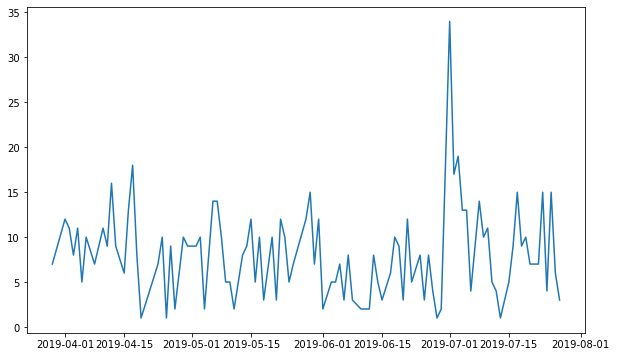

In [92]:
plt.plot(a.tail(100))

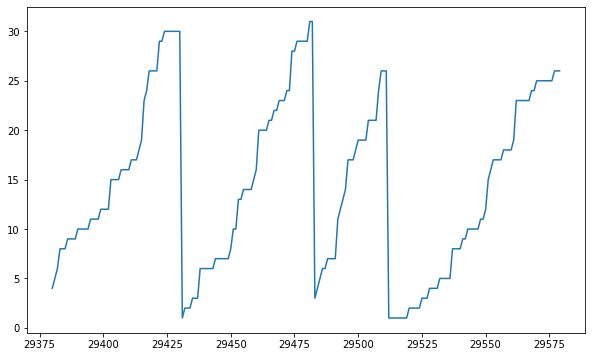

In [88]:
#plt.plot(df.groupby([df.date.dt.isocalendar().week]).agg('count'))
plt.plot(df.date.dt.day.tail(200))

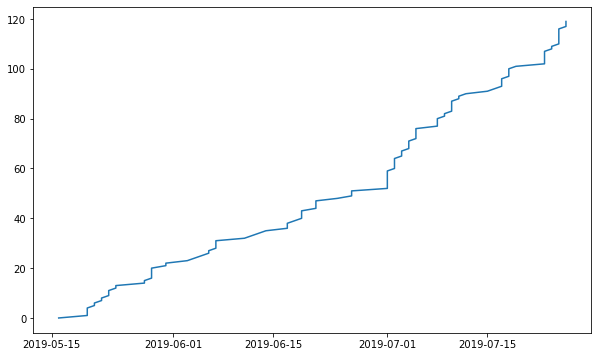

In [87]:
plt.plot(df.date.tail(120), range(0,120,1))

In [203]:
len(df2015_20_2018_22)

12641

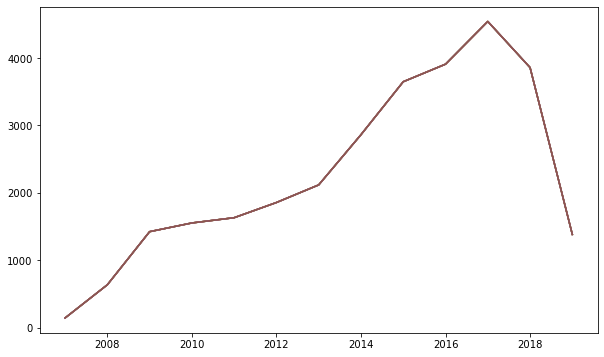

In [90]:
plt.plot(df.groupby([df.date.dt.year]).agg('count'))

In [202]:
df_4=df[df.yearweek>"2015-20"]
df_4=df_4[df_4.yearweek<"2018-22"]
df_41 = df_4[df_4["planet"]=="mars"]
df_411 = df_41[df_41["product"]=="deep though"]
len(df_411)

899

In [204]:
df2015_20_2018_22["planet"].groupby([df2015_20_2018_22["product"]]).agg('count')

product
deep though                      899
eddie                           4388
infinite improbability drive    4823
marwin                            12
towel                           1686
vogon poetry                     833
Name: planet, dtype: int64